In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pprint import pprint

In [76]:
#load up the data
movieData = pd.read_csv('movieData_No_Budget.csv', index_col=False)

#rename index
# Rename index
movieData = movieData.set_index('Unnamed: 0')
movieData = movieData.rename_axis('index')

#remove no votes
movieData.drop(movieData.index[movieData['Vote Count'] == 0], inplace = True)

movieData.head(5)

Movie      ID Release date  \
index                                                                  
0                                  The Irishman  398978   2019-11-01   
1      David Attenborough: A Life on Our Planet  664280   2020-09-28   
2                                          Roma  426426   2018-08-25   
3             To All the Boys I've Loved Before  466282   2018-08-16   
4                            The Social Dilemma  656690   2020-01-26   

       popularity        genres  Vote Average  Vote Count Original Language  
index                                                                        
0          25.287  [80, 18, 36]           7.6        5490                en  
1          12.370          [99]           8.5         231                en  
2          14.424          [18]           7.7        3431                es  
3          74.988   [35, 10749]           7.7        7636                en  
4          15.102      [99, 18]           7.5        1251                en

In [81]:
languageDF = movieData[["Original Language", "Vote Average" ,"Vote Count" ]]

languageDF[languageDF['Vote Count'] != 0]

languageStatsDF = languageDF.groupby(["Original Language"]).agg(['mean','median','sum'])
languageStatsDF

Vote Average                   Vote Count                 
                          mean median      sum         mean  median      sum
Original Language                                                           
af                    7.000000   7.00      7.0    53.000000    53.0       53
ar                    7.200000   7.20     14.4    82.000000    82.0      164
ca                    6.400000   6.40      6.4    23.000000    23.0       23
da                    7.166667   7.30     21.5  1189.000000  1357.0     3567
de                    6.500000   6.80     45.5   543.571429   367.0     3805
en                    6.326307   6.40  14765.6   914.069409   132.5  2133438
es                    6.320000   6.30    284.4   267.888889    51.0    12055
fa                    7.300000   7.30      7.3   700.000000   700.0      700
fr                    6.420833   6.40    154.1   318.291667   170.0     7639
he                    7.300000   7.30      7.3    12.000000    12.0       12
hi                    6.535593   6.70    385.6    57.796610    33.0     3410
hu                    6.100000   6.10      6.1    17.000000    17.0       17
id                    6.925000   7.00     55.4   102.625000     6.5      821
it                    6.071429   6.10     42.5   343.142857    68.0     2402
ja                    7.250000   7.25     29.0   219.750000   161.5      879
km                    5.900000   5.90      5.9    43.000000    43.0       43
kn                    6.800000   6.80      6.8    32.000000    32.0       32
ko                    7.533333   7.00     45.2  3800.500000   264.5    22803
mi                    6.100000   6.10      6.1    84.000000    84.0       84
ml                    6.933333   7.00     20.8    23.000000    20.0       69
ms                    5.900000   5.90      5.9    13.000000    13.0       13
nl                    6.600000   6.60     13.2   163.500000   163.5      327
no                    5.900000   5.70     17.7   433.000000   492.0     1299
pa                    6.655556   7.00     59.9     1.777778     1.0       16
pl                    6.000000   5.95     24.0  1908.000000   197.0     7632
pt                    7.233333   7.10     21.7    77.666667    70.0      233
ru                    5.800000   6.40     29.0   224.200000   157.0     1121
sv                    6.450000   6.45     25.8   642.000000   674.5     2568
ta                    5.300000   5.30      5.3    10.000000    10.0       10
te                    5.500000   5.50     11.0    13.500000    13.5       27
th                    8.000000   8.00      8.0   639.000000   639.0      639
tl                    6.581250   6.50    105.3    25.875000    16.5      414
tr                    5.364286   5.70     75.1    36.857143    26.0      516
uk                    8.000000   8.00      8.0   228.000000   228.0      228
ur                    9.200000   9.20      9.2     3.000000     3.0        3
yi                    6.400000   6.40      6.4    46.000000    46.0       46
zh                    5.750000   5.75     11.5    72.500000    72.5      145

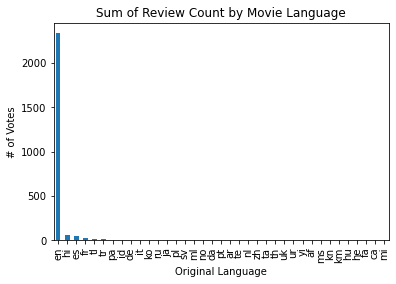

In [171]:
voteCountDF = movieData[["Original Language","Vote Count"]]
voteCountC = voteCountDF.value_counts("Original Language")

fig1 =voteCountC.plot(kind="bar"
                     ,title = "Sum of Review Count by Movie Language",
                     xlabel="Original Language", ylabel = "# of Votes")

plt.savefig("Images/ReviewCount.png")

plt.show()


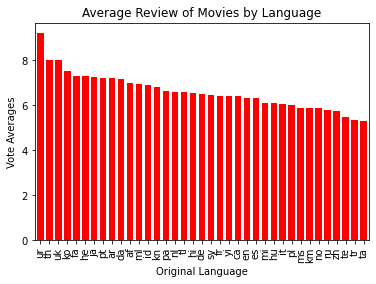

In [173]:
voteReviewDF = movieData[["Original Language","Vote Average"]]

voteReviewStatsDF = voteReviewDF.groupby(["Original Language"]).mean()
voteReviewStatsDF.columns = ["Mean"]
voteReviewStatsDF = voteReviewStatsDF.sort_values(["Mean"], ascending=[False]) #sort the data

voteReviewStatsC = voteReviewStatsDF[("Mean")]




fig2 =voteReviewStatsC.plot(kind="bar"
                     ,title = "Average Review of Movies by Language",
                     xlabel="Original Language", ylabel = "Vote Averages",
                           color = "red", width = .75)

plt.savefig("Images/AverageReview.png")

plt.show()

In [149]:
#quartiles
LanguagetestDF = movieData[["Original Language","Vote Average"]]
LanguagetestDF

Original Language  Vote Average
index                                
0                    en           7.6
1                    en           8.5
2                    es           7.7
3                    en           7.7
4                    en           7.5
...                 ...           ...
2629                 en           7.2
2630                 en          10.0
2631                 en           8.0
2634                 en           0.0
2638                 en           9.5

[2580 rows x 2 columns]

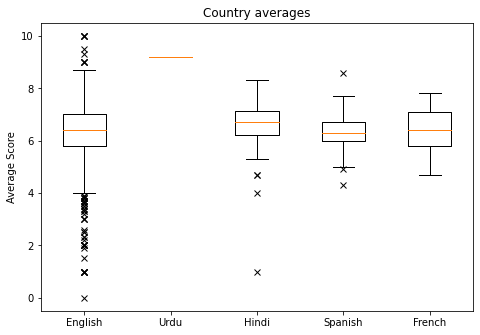

In [174]:
LanguageList = ['English', 'Urdu', 'Hindi', 'Spanish' , 'French']

English = LanguagetestDF.loc[LanguagetestDF["Original Language"] == "en",:]
en = English['Vote Average']

Urdu = LanguagetestDF.loc[LanguagetestDF["Original Language"] == "ur",:]
ur = Urdu['Vote Average']

Hindi = LanguagetestDF.loc[LanguagetestDF["Original Language"] == "hi",:]
hi = Hindi['Vote Average']

Spanish = LanguagetestDF.loc[LanguagetestDF["Original Language"] == "es",:]
es = Spanish['Vote Average']

French = LanguagetestDF.loc[LanguagetestDF["Original Language"] == "fr",:]
fr = French['Vote Average']

#data list
data = [en,ur,hi,es,fr]

fig = plt.figure()

#axes instance

ax = fig.add_axes([0,0,1,1,])
plt.boxplot(data, labels=LanguageList,flierprops=dict(markerfacecolor='g', marker='x'))
ax.set_title('Country averages')
ax.set_ylabel('Average Score')
 
# show plot

plt.savefig("Images/BoxPlot.png")

plt.show()